In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pydicom
import tqdm
import os
import csv

In [2]:
results_file = '../results/encoder-comparisons.csv'
df = pd.read_csv(results_file)

df.head()

,File,Raw,ZIP,PNG,RLE,JP2,CCT
0,(0003)-1-001.dcm,524288,295851,263782,304698,307826,224170
1,(0004)-1-002.dcm,524288,297801,265472,304374,309471,224967
2,(0005)-1-003.dcm,524288,300580,267121,304832,311475,226024
3,(0006)-1-004.dcm,524288,301763,268408,303902,312502,226337
4,(0007)-1-005.dcm,524288,301356,268897,303304,312964,226024


In [3]:
entropies = {}
with open('../results/file-entropies.csv', 'r') as fin:
	for row in csv.DictReader(fin):
		entropies[row['File']] = row['Entropy']

In [4]:
# import scipy.stats

# def get_entropy(labels, base = None):
# 	value, counts = np.unique(labels, return_counts = True)
# 	return scipy.stats.entropy(counts, base = base)

# dataset_directory = 'C:/Users/taaha/Downloads/manifest-OtXaMwL56190865641215613043/QIN LUNG CT/'
# filenames = set(df['File'])

# entropies = {}

# for n, filename in tqdm.tqdm(enumerate(glob.glob(dataset_directory + '**/*.dcm', recursive = True)), total = 4044):

# 	# Skip not completed files
# 	ufile = f'({n:04})-{os.path.basename(filename)}'
# 	if ufile not in filenames:
# 		# print(f'({n}) skipping file {ufile}')
# 		continue

# 	# Skip all non-CT scan files
# 	ds = pydicom.read_file(filename)
# 	# if ds.SOPClassUID != pydicom.uid.CTImageStorage:
# 	# 	print(f'({n}) skipping id: {ds.SOPClassUID}')
# 	# 	continue

# 	data = ds.pixel_array
# 	entropy = get_entropy(data)

# 	entropies[ufile] = entropy


In [5]:
dfout = pd.DataFrame({"File": list(entropies.keys()), "Entropy": list(entropies.values())})
dfout.to_csv('../results/file-entropies.csv', index = False)

df['Entropy'] = dfout['Entropy']
df = df.sort_values(by = ['Entropy'])

# df['Shuffle'] = np.random.rand(len(df['File']))
# df = df.sort_values(by = ['Shuffle'])

df.head()

,File,Raw,ZIP,PNG,RLE,JP2,CCT,Entropy
2412,(2502)-1-16.dcm,524288,214852,183600,202154,220744,156891,4.733746241314835
2406,(2496)-1-10.dcm,524288,212925,179931,200312,217127,153598,4.736547278823286
2407,(2497)-1-11.dcm,524288,212944,179544,200578,217492,153922,4.738003968353189
2408,(2498)-1-12.dcm,524288,212875,180193,201176,218582,154440,4.738293851703754
2403,(2493)-1-07.dcm,524288,210304,177457,199586,214379,150699,4.743575558550769


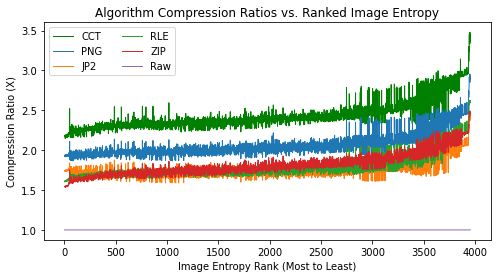

In [9]:
# colors = ['green', None, None, None, None, None]

plt.figure(figsize = (8, 4))

algorithms = ('CCT', 'PNG', 'JP2', 'RLE', 'ZIP', 'Raw')
ranks = range(len(df['File']), 0, -1)
for i, col in enumerate(algorithms):
	ratios = (512 * 512 * 2) / np.array(df[col], dtype = float)
	if col == 'CCT':
		sns.lineplot(x = ranks, y = ratios, linewidth = 1, color = 'green')
	else:
		sns.lineplot(x = ranks, y = ratios, linewidth = 1)#, color = colors[i])
	# sns.lineplot(x = ranks, y = list(df[col]), linewidth = 0.2)

plt.legend(labels = algorithms, ncol = 2)
plt.title('Algorithm Compression Ratios vs. Ranked Image Entropy')
plt.ylabel('Compression Ratio (X)')
plt.xlabel('Image Entropy Rank (Most to Least)')
plt.savefig('../results/figures/entropy.png', dpi = 300)
# plt.grid()
# plt.ylim(120000, 350000)

In [7]:
raise

RuntimeError: No active exception to reraise

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'CCT', data = df)
plt.title('CompaCT (CCT) File Sizes vs. Data Entropy')
plt.ylabel('CCT File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)

(120000.0, 550000.0)

Error in callback <function flush_figures at 0x00000200FE3DEDC0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'JP2', data = df)
plt.title('JPEG2000-Lossless (JP2) File Sizes vs. Data Entropy')
plt.ylabel('JP2 File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)

(120000.0, 550000.0)

Error in callback <function flush_figures at 0x0000023980C1CDC0> (for post_execute):


KeyboardInterrupt: 

(120000.0, 550000.0)

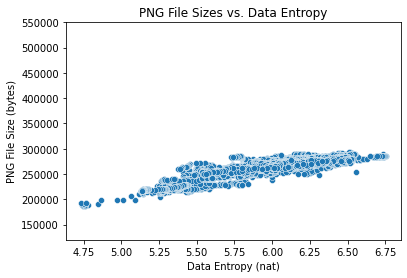

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'PNG', data = df)
plt.title('PNG File Sizes vs. Data Entropy')
plt.ylabel('PNG File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)

(120000.0, 550000.0)

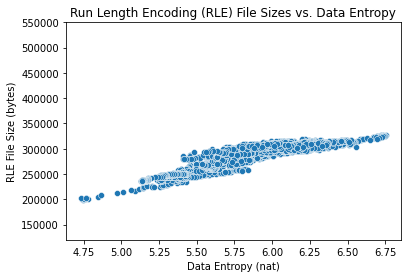

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'RLE', data = df)
plt.title('Run Length Encoding (RLE) File Sizes vs. Data Entropy')
plt.ylabel('RLE File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)

(120000.0, 550000.0)

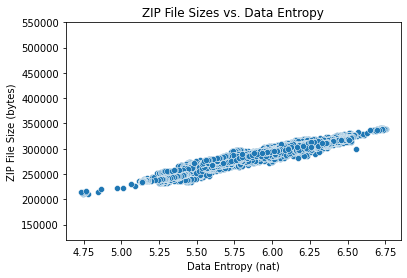

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'ZIP', data = df)
plt.title('ZIP File Sizes vs. Data Entropy')
plt.ylabel('ZIP File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)

(120000.0, 550000.0)

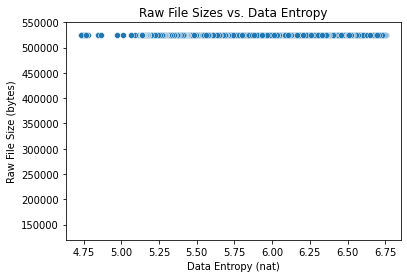

In [ ]:
sns.scatterplot(x = 'Entropy', y = 'Raw', data = df)
plt.title('Raw File Sizes vs. Data Entropy')
plt.ylabel('Raw File Size (bytes)')
plt.xlabel('Data Entropy (nat)')
plt.ylim(120000, 550000)